In [ ]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
import os

In [ ]:
# Download dataset
# !wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1Onr95_VyDaC9Cbw-MXquanHvht5lnK6g" -O augmented_cropped_data2_1209.zip
# !unzip -q /content/augmented_cropped_data2_1209.zip -d /content

# data_v1
# !gdown --folder https://drive.google.com/file/d/1XCNAmjYFSPnoPmZDWzhvsJq5OoxYOwaW/view?usp=drive_link
# !wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1XCNAmjYFSPnoPmZDWzhvsJq5OoxYOwaW" -O data_v1.zip
!unzip -q /content/augmented_cropped_data2_12091145.zip -d /content/


# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Sort data into labeled folders, then create and train and test split

import os
import shutil
from sklearn.model_selection import train_test_split

# Define directories
dataset_dir = "/content/content/augmented_cropped_data2_12091145"  # Path to your dataset


## Sort data into folders labeled by length

# Iterate through all length labels (e.g., A4, C5, etc.)
POSSIBLE_NOTE_LENGTHS = ["16th", "eighth", "whole", "half", "quarter"]
# Get a list of all images in the dataset directory
all_images = [f for f in os.listdir(dataset_dir) if f.lower().endswith('png')]
print(all_images)
# Iterate through all the possible labels
for label in POSSIBLE_NOTE_LENGTHS:

    # Create a subdirectory for each label inside the dataset directory
    label_dir = os.path.join(dataset_dir, label)
    os.makedirs(label_dir, exist_ok=True)

    # Filter the images that contain the current label in their filename
    label_images = [img for img in all_images if label in img]

    # Move the images to their respective label folder
    for img in label_images:
        shutil.move(os.path.join(dataset_dir, img), os.path.join(label_dir, img))




## Sort data into a train and test set

# Define directories
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

# Create directories for train and test sets if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate through all the possible labels
for label in POSSIBLE_NOTE_LENGTHS:
    # Path to the label directory
    label_dir = os.path.join(dataset_dir, label)

    # Get a list of all images for the current label
    label_images = [f for f in os.listdir(label_dir) if f.lower().endswith('png')]
    print(label_images)
    # Split the images into train and test sets using train_test_split
    train_images, test_images = train_test_split(label_images, test_size=0.2, random_state=42)

    # Create subdirectories for this label under both train and test
    label_train_dir = os.path.join(train_dir, label)
    label_test_dir = os.path.join(test_dir, label)
    os.makedirs(label_train_dir, exist_ok=True)
    os.makedirs(label_test_dir, exist_ok=True)

    # Move the images to their respective directories
    for img in train_images:
        shutil.move(os.path.join(label_dir, img), os.path.join(label_train_dir, img))

    for img in test_images:
        shutil.move(os.path.join(label_dir, img), os.path.join(label_test_dir, img))



# Remove empty directories from the original dataset
for label in POSSIBLE_NOTE_LENGTHS:
    label_dir = os.path.join(dataset_dir, label)
    if not os.listdir(label_dir):  # If the directory is empty
        os.rmdir(label_dir)  # Remove the empty directory


['note_C6_eighth_variation_1_3.png_0_8797.png', 'note_C4_eighth_variation_1_1.png_0_5861.png', 'note_F5_eighth_variation_4_2.png_0_5878.png', 'note_D5_16th_variation_0_3.png_0_7877.png', 'note_G4_whole_variation_2_0.png_0_3931.png', 'note_C6_half_variation_0_2.png_0_4249.png', 'note_G5_whole_variation_2_0.png_0_5339.png', 'note_D4_quarter_variation_1_3.png_0_9881.png', 'note_E4_16th_variation_4_1.png_0_4154.png', 'note_B3_half_variation_2_2.png_0_8384.png', 'note_F4_eighth_variation_2_4.png_0_3646.png', 'note_C5_16th_variation_1_0.png_0_3910.png', 'note_A5_eighth_variation_5_4.png_0_4340.png', 'note_A5_half_variation_2_2.png_0_3892.png', 'note_A5_quarter_variation_2_3.png_0_1106.png', 'note_C4_eighth_variation_5_0.png_0_4700.png', 'note_D5_eighth_variation_3_1.png_0_8122.png', 'note_F5_quarter_variation_2_3.png_0_9479.png', 'note_D5_half_variation_2_3.png_0_3435.png', 'note_B3_eighth_variation_3_1.png_0_9390.png', 'note_A3_eighth_variation_4_0.png_0_5196.png', 'note_B5_eighth_variation

In [ ]:
# Define image transformations for data augmentation
IMAGE_SIZE = 32  # Desired size for the square images

resize = transforms.Compose([
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE), antialias=True),  # Resize to 32x32
])

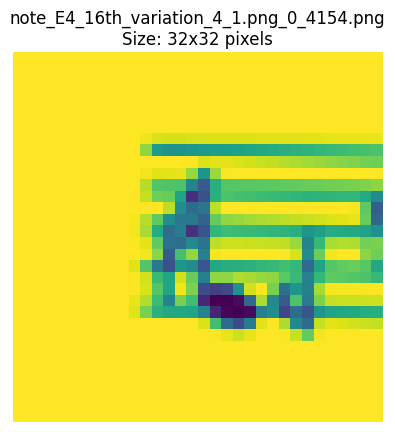

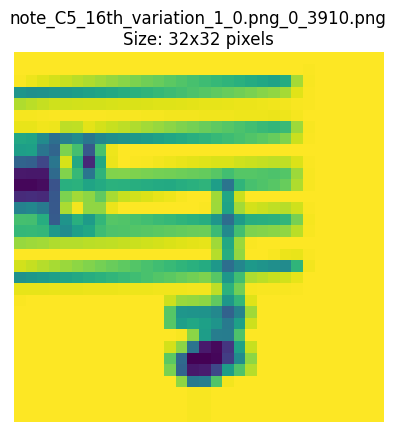

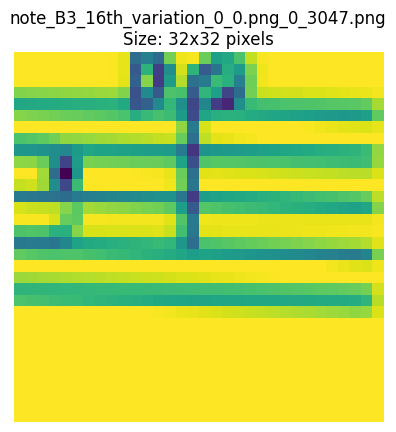

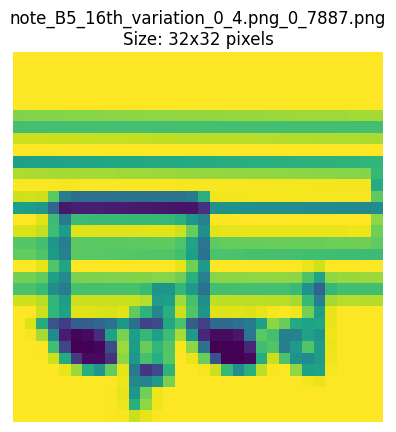

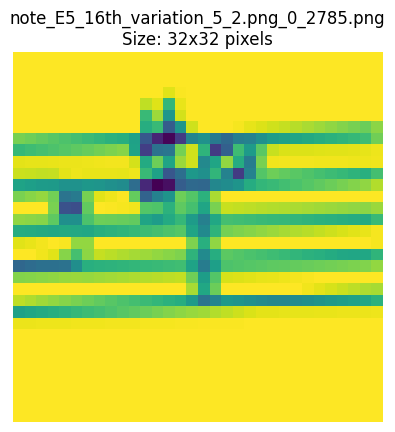

In [ ]:
# View some of the data

from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os


# Directory containing your images
image_dir = "/content/content/augmented_cropped_data2_12091145/train/16th"

# List the files in the directory
images = [f for f in os.listdir(image_dir) if f.endswith('.png')]


# Display some images and their sizes
for i, img_name in enumerate(images[:5]):  # Limit to first 5 images
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)

    # Perform image transforms
    img = resize(img)

    # Get width and height
    width, height = img.size

    # Display the image
    plt.figure()
    plt.imshow(img)
    plt.axis('off')  # Turn off axes
    plt.title(f"{img_name}\nSize: {width}x{height} pixels")
    plt.show()

In [ ]:
# Configuration
DATA_DIR = "/content/content/augmented_cropped_data2_12091145"  # Path to the dataset
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001

# Data Preparation
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE), antialias=True),  # Resize to 32x32
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale if not already
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

train_dataset = datasets.ImageFolder(root=os.path.join(DATA_DIR, "train"), transform=transform)
test_dataset = datasets.ImageFolder(root=os.path.join(DATA_DIR, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# CNN Model
class LengthClassifier(nn.Module):
    def __init__(self, num_classes):
        super(LengthClassifier, self).__init__()
        self.conv_layers = nn.Sequential(

            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Dropout(p=0.2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output becomes 2x2

            nn.Dropout(p=0.2),
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 2 * 2, 512), # channels of last output layer * output dimensions, basically number of output parameters from convolutions
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Initialize Model
num_classes = len(train_dataset.classes)  # Automatically detect the number of classes
model = LengthClassifier(num_classes)

# Training Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
train_losses = []
test_losses = []
accuracies = []

# Training Loop
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs):
    for epoch in range(epochs):
        model.train()
        train_loss, correct = 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            # Metrics
            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

        train_accuracy = correct / len(train_loader.dataset)
        train_loss = train_loss / len(train_loader.dataset)
        test_accuracy, test_loss = evaluate_model(model, test_loader, criterion)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        accuracies.append(test_accuracy)

        # Step the scheduler
        scheduler.step(test_loss)

        print(f"Epoch {epoch+1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, "
              f"Test Loss: {test_loss:.4f}, "
              f"Train Accuracy: {train_accuracy:.4f}, "
              f"Test Accuracy: {test_accuracy:.4f}")


def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct, test_loss = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
    return correct / len(test_loader.dataset), test_loss / len(test_loader.dataset)  # Average test loss per batch

# Start Training
train_model(model, train_loader, test_loader, criterion, optimizer, EPOCHS)


Epoch 1/20, Train Loss: 0.0480, Test Loss: 0.0469, Train Accuracy: 0.2974, Test Accuracy: 0.3125


In [ ]:
# Save the model's weights
torch.save(model.state_dict(), "length_classifier.pth")

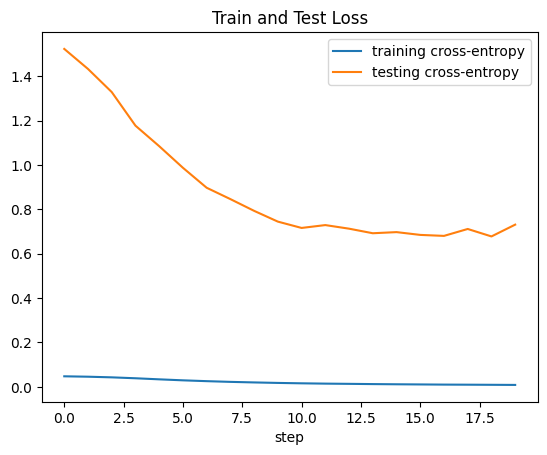

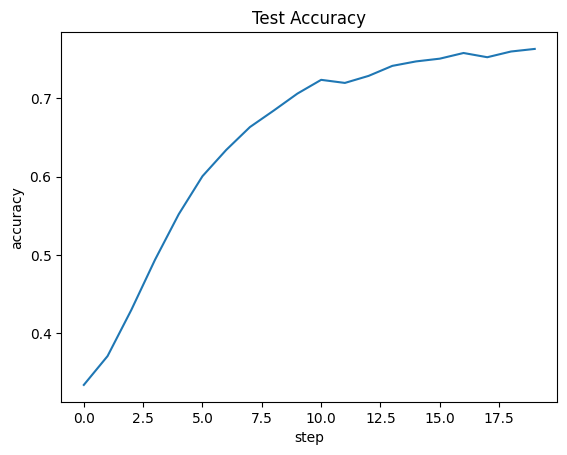

In [ ]:
# Plot a graph of the loss
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(EPOCHS), train_losses, label='training cross-entropy')
plt.plot(range(EPOCHS), test_losses, label='testing cross-entropy')
plt.title('Train and Test Loss')
plt.xlabel('step')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(EPOCHS), accuracies)
plt.title('Test Accuracy')
plt.xlabel('step')
plt.ylabel('accuracy')
plt.show()

In [ ]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1JqC15wvkm34cUGlPpz8gnRxRdpU1s1tX" -O augmented_augmented_data.zip
!unzip -q /content/augmented_cropped_data2_1209.zip -d /content

In [ ]:

# Function to load the trained model
def load_model(model_path, num_classes):
    model = LengthClassifier(num_classes)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()
    return model


# Function to predict the class of an input image
def predict_image(model, image_path, class_labels):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load and preprocess the image
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Make prediction
    with torch.no_grad():
        outputs = model(image)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
        confidence = probabilities[0][predicted_class].item()

    return class_labels[predicted_class], confidence


# Usage Example

# Path to the saved model
model_path = "./length_classifier1.pth"  # Replace with your model's path

# Load model and class labels
class_labels = train_dataset.classes  # Use the same labels as during training
model = load_model(model_path, len(class_labels))

test_data = os.listdir("test_data")

for image in test_data:
    image_path = os.path.join("test_data", image)
    # # Path to an input image
    # image_path = "C4th.png"  # Replace with your test image

    # Get prediction
    predicted_label, confidence = predict_image(model, image_path, class_labels)
    print(
        f"File Name: {image}, Predicted label: {predicted_label}, Confidence: {confidence:.4f}"
    )


In [ ]:
!zip -r /content/data_length_final.zip /content/data_v1/


  adding: content/data_v1/ (stored 0%)
  adding: content/data_v1/test/ (stored 0%)
  adding: content/data_v1/test/quarter/ (stored 0%)
  adding: content/data_v1/test/quarter/note_B5_quarter_variation_0_0.png (stored 0%)
  adding: content/data_v1/test/quarter/note_G4_quarter_variation_0_4.png (deflated 0%)
  adding: content/data_v1/test/quarter/note_G4_quarter_variation_0_0.png (stored 0%)
  adding: content/data_v1/test/quarter/note_F4_quarter_variation_1_0.png (stored 0%)
  adding: content/data_v1/test/quarter/note_A4_quarter_variation_2_1.png (stored 0%)
  adding: content/data_v1/test/quarter/note_D4_quarter_variation_2_0.png (stored 0%)
  adding: content/data_v1/test/quarter/note_A5_quarter_variation_2_2.png (stored 0%)
  adding: content/data_v1/test/quarter/note_A4_quarter_variation_0_2.png (stored 0%)
  adding: content/data_v1/test/quarter/note_B4_quarter_variation_1_4.png (stored 0%)
  adding: content/data_v1/test/quarter/note_C4_quarter_variation_0_3.png (stored 0%)
  adding: con

In [ ]:
from google.colab import files
files.download("/content/data_length_final.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>